## Simulating 2021 water limited Soybean production in Ndhiwa Homabay county.

##### The input data for simulation is adopted from Alfred Nyambane's thesis report

### Importing relevant modules

In [1]:
%matplotlib inline
import sys, os
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import pandas as pd

data_dir = os.path.join(os.getcwd(), "data")
import pcse
print("This notebook was built with:")
print("python version: %s " % sys.version)
print("PCSE version: %s" %  pcse.__version__)

This notebook was built with:
python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) 
[GCC 9.4.0] 
PCSE version: 5.5.0


In [2]:
from pcse.fileinput import CABOFileReader
from pcse.util import WOFOST71SiteDataProvider
from pcse.fileinput import PCSEFileReader
from pcse.base import ParameterProvider
from pcse.fileinput import YAMLCropDataProvider
from pcse.fileinput import YAMLAgroManagementReader
from pcse.base import ParameterProvider
from pcse.fileinput import ExcelWeatherDataProvider
from pcse.models import Wofost71_WLP_FD, Wofost71_PP

### Importing CABOFileReader (crop and soil files are saved in CABO format) and  WOFOST71SiteDataProvider. 

In [3]:
sited = WOFOST71SiteDataProvider(WAV=10, CO2=360)
print(sited)

{'IFUNRN': 0, 'NOTINF': 0, 'SSI': 0.0, 'SSMAX': 0.0, 'WAV': 10.0, 'SMLIM': 0.4, 'CO2': 360.0}


### Reading model parameters.

In [4]:
#crop = PCSEFileReader(os.path.join(data_dir, "crop", "lintul3_soybean.crop"))
cropd = YAMLCropDataProvider(os.path.join(data_dir, "crop"))
cropd.set_active_crop('soybean', 'Soybean_901')
#soil = PCSEFileReader(os.path.join(data_dir, "soil", "lintul3_soybeans.soil"))
#site = PCSEFileReader(os.path.join(data_dir, "site", "lintul3_soybeans.site"))
#parameterprovider = ParameterProvider(soildata=soil, cropdata=cropd, sitedata=site)
#parameterprovider = ParameterProvider(soildata=soil, cropdata=crop, sitedata=site)

##### The crop profile for SeedCo. SC-Saga soybean cultivar was adopted from the soybean,(original W41) in WOFOST database. This is because Soybean,(original W41) was derived for assessment of tropical region crop production potential by WOFOST developers. 

In [5]:
soilfile = os.path.join(data_dir, 'soil', 'M04.AWC')
soild = CABOFileReader(soilfile)

#####  The soil at the experiment site has 63.8% sand, 36% and 0.21% clay and silt respectively. According to the USDA soil texture triangle, the soil is sandy clay loam and roughly matches with the texture-1 coarse, AWC 150 mm soil in WOFOST. 

### Importing ParameterProvider

In [6]:
parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)

### Importing YAMLAgroManagementReader

In [7]:
agromanagement_file = os.path.join(data_dir, 'agro', 'lintul3_soybeans_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2020-08-31:
    CropCalendar:
      crop_end_date: 2021-01-12
      crop_end_type: earliest
      crop_name: soybean
      crop_start_date: 2020-09-15
      crop_start_type: sowing
      max_duration: 120
      variety_name: Soybean_907
    StateEvents: null
    TimedEvents:
    - comment: All nitrogen amounts in g N m-2
      event_signal: apply_n
      events_table:
      - 2020-09-15:
          amount: 2.2
          recovery: 0.7
      name: Nitrogen application table



### Importing ExcelWeatherDataProvider and reading weather data 

In [8]:
weatherfile = os.path.join(data_dir, 'meteo', 'chwele.xls')
wdp = ExcelWeatherDataProvider(weatherfile)
print(wdp)

Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: Chwele, Kenya
Station: NIL
Description: Observed data from Chwele, Kenya
Source: NIL
Contact: KALRO/ AgriBORA
----Site characteristics----
Elevation: 1625.0
Latitude:  34.577
Longitude:  0.736
Data available for 2016-01-01 - 2021-08-30
Number of missing days: 0



##### The weather data is downloaded from meteoblue historybasic and historysolar and saved in an excel file. The global horizontal irradiation (GHI) downloaded from the historysolar URL is considered as the irradiation variable. GHI downloaded is in Wh/m^2 and not W/m^2. This is then converted to the kJ/M62/day that is compartible to the WOFOST model. 

### Importing, initializing and running a PCSE model

In [9]:
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)

In [10]:
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
#df_results.info()
df_results.tail()

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2020-12-16,1.942594,0.587568,1687.882837,889.853793,565.460313,232.568731,206.564286,0.062160,82.0,0.177435,23.378745
2020-12-17,1.959435,0.559163,1687.882837,889.853793,565.460313,232.568731,206.564286,0.044259,82.0,0.176564,23.307312
2020-12-18,1.977476,0.528329,1687.882837,889.853793,565.460313,232.568731,206.564286,0.037282,82.0,0.175931,23.255412
2020-12-19,1.993535,0.499274,1687.882837,889.853793,565.460313,232.568731,206.564286,0.043761,82.0,0.176355,23.290174
2020-12-20,2.000000,0.444863,1687.882837,889.853793,565.460313,232.568731,206.564286,0.039814,82.0,0.177576,23.390317


##### The simulated yield (TWSO) at simulated maturity (DAS =93) is 1824 kg/ha.

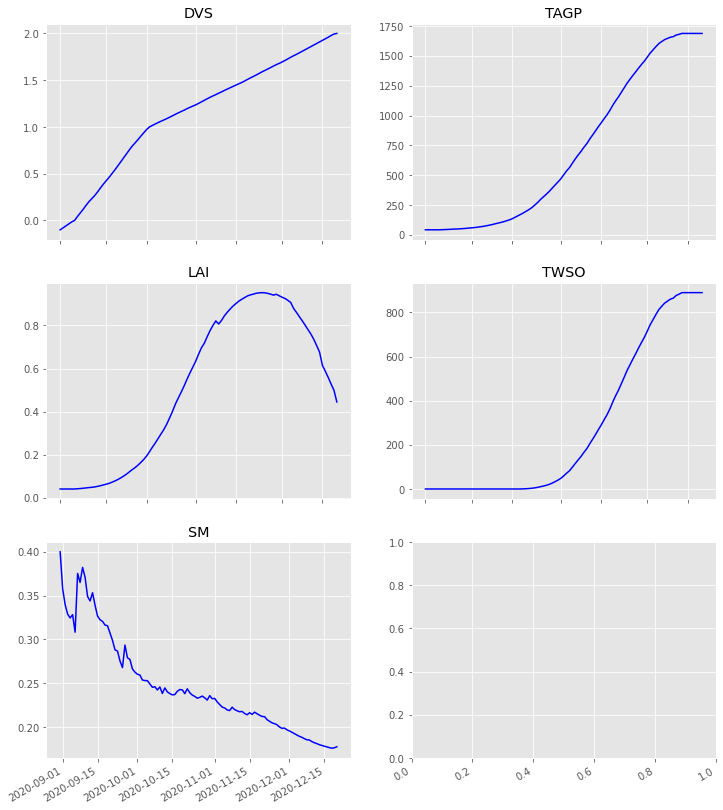

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,15))
for var, ax in zip(["DVS", "TAGP", "LAI","TWSO", "SM"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
fig.autofmt_xdate()